<a href="https://colab.research.google.com/github/mmalik17/Sales-Analysis/blob/main/Basic_ecommerce_purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import numpy as np
import pandas as pd

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# DATA UNDERSTANDING

In [81]:
data = pd.read_csv('https://raw.githubusercontent.com/mmalik17/Sales-Analysis/main/Ecommerce%20Purchases.csv')

In [82]:
data.head() #look at data sample

#the purpose is to idemtify the data grain of the table. from the table below, it is concluded that every row represent one transaction.

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


from data.info(), I assumed that the variables that may influence the purchase price are Job, company or address info. for the last section, I will analyze the relationship of job, company, and region (from address info) to total purchase

In [84]:
data.shape

(10000, 14)

In [85]:
data.describe()

,Credit Card,CC Security Code,Purchase Price
count,1.000000e+04,10000.000000,10000.000000
mean,2.341374e+15,907.217800,50.347302
std,2.256103e+15,1589.693035,29.015836
min,6.040186e+10,0.000000,0.000000
25%,3.056322e+13,280.000000,25.150000
50%,8.699942e+14,548.000000,50.505000
75%,4.492298e+15,816.000000,75.770000
max,6.012000e+15,9993.000000,99.990000


#DATA CLEANING AND PREPARATION

In [86]:
data.isnull().sum()

Address             0
Lot                 0
AM or PM            0
Browser Info        0
Company             0
Credit Card         0
CC Exp Date         0
CC Security Code    0
CC Provider         0
Email               0
Job                 0
IP Address          0
Language            0
Purchase Price      0
dtype: int64

In [87]:
data.duplicated().sum()

0

In [88]:
#There is no cleaning data needed because there is no missing and duplicated data

#RELATIONSHIP ANALYSIS

from data.info(), I assumed that the variables that may influence the purchase price are Job, company or address info. for the last section, I will analyze the relationship of job, company, and region (from address info) to total purchase

In [89]:
selected_data = data[['Address','Company','Job','Purchase Price']]

In [90]:
selected_data.head()

,Address,Company,Job,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",Martinez-Herman,"Scientist, product/process development",98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...","Fletcher, Richards and Whitaker",Drilling engineer,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,"Simpson, Williams and Pham",Customer service manager,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798","Williams, Marshall and Buchanan",Drilling engineer,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...","Brown, Watson and Andrews",Fine artist,77.82


## Analyze relationship between job data to purchase Price

In [91]:
selected_data['Job'].nunique()

623

In [92]:
#summing the total purchase price of every type of job
selected_data.groupby('Job').sum()

,Purchase Price
Job,
Academic librarian,527.47
Accommodation manager,629.65
"Accountant, chartered",1051.31
"Accountant, chartered certified",1043.01
"Accountant, chartered management",1036.24
...,...
Water quality scientist,837.47
Web designer,1195.29
Wellsite geologist,1231.42


In [93]:
selected_data.groupby('Job').sum().sort_values(by='Purchase Price', ascending=False)

,Purchase Price
Job,
Dietitian,1605.30
Lawyer,1603.85
Purchasing manager,1577.97
"Therapist, art",1526.31
Clinical cytogeneticist,1495.92
...,...
Music therapist,327.50
Actuary,262.72
Information systems manager,241.42


In [94]:
#show the top 10 jobs with the highest purchase price
job_purchase = selected_data.groupby('Job').sum().sort_values(by='Purchase Price', ascending=False)
job_purchase

,Purchase Price
Job,
Dietitian,1605.30
Lawyer,1603.85
Purchasing manager,1577.97
"Therapist, art",1526.31
Clinical cytogeneticist,1495.92
...,...
Music therapist,327.50
Actuary,262.72
Information systems manager,241.42


In [95]:
job_purchase.describe()

,Purchase Price
count,623.000000
mean,808.142889
std,251.121762
min,219.050000
25%,627.620000
50%,791.950000
75%,973.895000
max,1605.300000


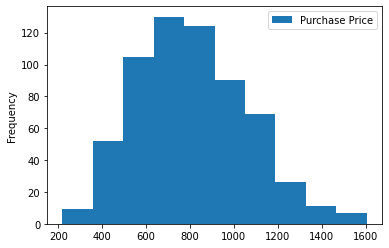

In [96]:
job_purchase.plot(kind='hist')

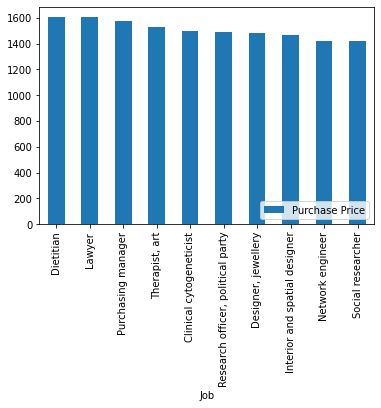

In [97]:
#Plotting the top 10 jobs with the highest purchase price in bar chart
job_purchase.head(10).plot(kind='bar')
plt.legend(loc='lower right')
plt.show()

In [98]:
#sort the total purchase price of every job

##Analyze relationship between company variable to purchase Price variable

In [99]:
selected_data['Company'].nunique()

8653

In [100]:
company_purchase = selected_data.groupby('Company').sum().sort_values(by=['Purchase Price'], ascending=False)
company_purchase

,Purchase Price
Company,
Brown Ltd,796.38
Williams LLC,723.63
Smith LLC,637.92
Smith PLC,601.37
Johnson Ltd,600.61
...,...
Washington-Johnson,0.03
Armstrong PLC,0.02
Sanchez-Stephenson,0.01


In [101]:
company_purchase.describe()

,Purchase Price
count,8653.000000
mean,58.184794
std,47.293323
min,0.000000
25%,27.630000
50%,54.430000
75%,80.400000
max,796.380000


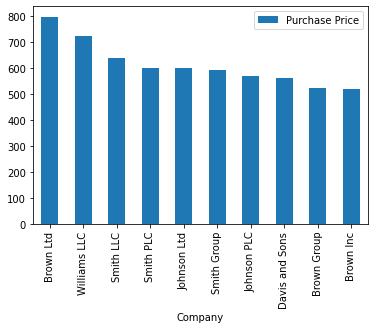

In [102]:
company_purchase.head(10).plot(kind='bar')

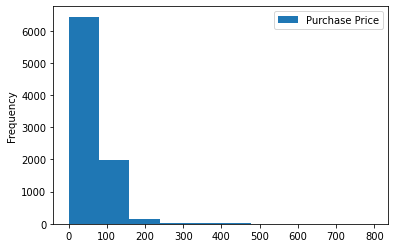

In [103]:
company_purchase.plot(kind='hist')

##Analyze relationship between region  variable to purchase Price variable

In [104]:
selected_data['Address']

0       16629 Pace Camp Apt. 448\nAlexisborough, NE 77...
1       9374 Jasmine Spurs Suite 508\nSouth John, TN 8...
2                        Unit 0065 Box 5052\nDPO AP 27450
3                   7780 Julia Fords\nNew Stacy, WA 45798
4       23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...
                              ...                        
9995        966 Castaneda Locks\nWest Juliafurt, CO 96415
9996    832 Curtis Dam Suite 785\nNorth Edwardburgh, T...
9997                Unit 4434 Box 6343\nDPO AE 28026-0283
9998                 0096 English Rest\nRoystad, IA 12457
9999       40674 Barrett Stravenue\nGrimesville, WI 79682
Name: Address, Length: 10000, dtype: object

In [105]:
selected_data['Address'] = selected_data['Address'].str.replace('\n', ' ')
selected_data['Address']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       16629 Pace Camp Apt. 448 Alexisborough, NE 771...
1       9374 Jasmine Spurs Suite 508 South John, TN 84...
2                         Unit 0065 Box 5052 DPO AP 27450
3                    7780 Julia Fords New Stacy, WA 45798
4       23012 Munoz Drive Suite 337 New Cynthia, TX 57826
                              ...                        
9995         966 Castaneda Locks West Juliafurt, CO 96415
9996    832 Curtis Dam Suite 785 North Edwardburgh, TX...
9997                 Unit 4434 Box 6343 DPO AE 28026-0283
9998                  0096 English Rest Roystad, IA 12457
9999        40674 Barrett Stravenue Grimesville, WI 79682
Name: Address, Length: 10000, dtype: object

In [107]:
selected_data

,Address,Company,Job,Purchase Price
0,"16629 Pace Camp Apt. 448 Alexisborough, NE 771...",Martinez-Herman,"Scientist, product/process development",98.14
1,"9374 Jasmine Spurs Suite 508 South John, TN 84...","Fletcher, Richards and Whitaker",Drilling engineer,70.73
2,Unit 0065 Box 5052 DPO AP 27450,"Simpson, Williams and Pham",Customer service manager,0.95
3,"7780 Julia Fords New Stacy, WA 45798","Williams, Marshall and Buchanan",Drilling engineer,78.04
4,"23012 Munoz Drive Suite 337 New Cynthia, TX 57826","Brown, Watson and Andrews",Fine artist,77.82
...,...,...,...,...
9995,"966 Castaneda Locks West Juliafurt, CO 96415",Randall-Sloan,Printmaker,82.21
9996,"832 Curtis Dam Suite 785 North Edwardburgh, TX...","Hale, Collins and Wilson",Energy engineer,25.63
9997,Unit 4434 Box 6343 DPO AE 28026-0283,Anderson Ltd,Veterinary surgeon,83.98
9998,"0096 English Rest Roystad, IA 12457",Cook Inc,Local government officer,38.84


In [106]:
#splitting address data to city and state
!pip install usaddress

import usaddress

def split():
    address_list = selected_data['Address']
    for addr in address_list:
        data = usaddress.tag(addr)
        if "PlaceName" in data[0].keys():
            print(data[0]["PlaceName"])
        else:
            print("no city/town")

split()

Alexisborough
South John
DPO
New Stacy
New Cynthia
Travisland
Andersonburgh
Castroberg
New Michelle
Extensions Lake Tinafort
Park Lake Maria
Thomasview
Boltonport
Alexanderbury
East Scottborough
Blakemouth
East Brittney
Port Kimberly
West Michaelchester
Boothton
Jamesview
Wilkinsonbury
Shortmouth
Russellmouth
DPO
Aaronhaven
North Kirsten
South Ashley
North Jonathanberg
West Susanton
Snowchester
FPO
DPO
Louischester
New Yvonnefurt
Laurabury
Christopherfort
Carloshaven
Port Davidtown
Berrybury
North Nicole
Anthonyside
Sarafort
Harbor Lake Brianahaven
Juliefurt
Perkinsberg
Susan
Maldonadoshire
Lake Sarahfort
Franklinside
Adamsfort
Ryanfurt
North Josephberg
APO
Weaverbury
Sandraview
North Hannahfurt
North Rebecca
Natalieland
Brandyville
Perkinsview
Jillland
Leeshire
West Edwardfort
Tracyborough
Port Roberttown
Ruiztown
Robertstad
West Rickytown
Cesarfort
DPO
Morganmouth
East Tracy
Burkeborough
Angelaburgh
APO
North Cliffordshire
Brook Lake Deanna
Lisa
South Kenneth
Robert
Alanfurt
New Made

RepeatedLabelError: ignored

In [110]:
selected_data['City'] = selected_data['Address'].apply(lambda x:split())
selected_data

Alexisborough
South John
DPO
New Stacy
New Cynthia
Travisland
Andersonburgh
Castroberg
New Michelle
Extensions Lake Tinafort
Park Lake Maria
Thomasview
Boltonport
Alexanderbury
East Scottborough
Blakemouth
East Brittney
Port Kimberly
West Michaelchester
Boothton
Jamesview
Wilkinsonbury
Shortmouth
Russellmouth
DPO
Aaronhaven
North Kirsten
South Ashley
North Jonathanberg
West Susanton
Snowchester
FPO
DPO
Louischester
New Yvonnefurt
Laurabury
Christopherfort
Carloshaven
Port Davidtown
Berrybury
North Nicole
Anthonyside
Sarafort
Harbor Lake Brianahaven
Juliefurt
Perkinsberg
Susan
Maldonadoshire
Lake Sarahfort
Franklinside
Adamsfort
Ryanfurt
North Josephberg
APO
Weaverbury
Sandraview
North Hannahfurt
North Rebecca
Natalieland
Brandyville
Perkinsview
Jillland
Leeshire
West Edwardfort
Tracyborough
Port Roberttown
Ruiztown
Robertstad
West Rickytown
Cesarfort
DPO
Morganmouth
East Tracy
Burkeborough
Angelaburgh
APO
North Cliffordshire
Brook Lake Deanna
Lisa
South Kenneth
Robert
Alanfurt
New Made

RepeatedLabelError: ignored

In [51]:
tesB = first[0].replace('\n',' ')
tesB

'16629 Pace Camp Apt. 448 Alexisborough, NE 77130-7478'

In [57]:
state_address = first[0][-13:-11]
state_address

'NE'

In [59]:
first[4]

'23012 Munoz Drive Suite 337\nNew Cynthia, TX 57826'

In [61]:
state_address = first[2][-13:-11]
state_address

'\nD'

In [ ]:
numpy = np.linspace(1,2,10)
numpy

In [ ]:
numcity = np

In [ ]:
pd.DataFrame(numpy)